<a href="https://colab.research.google.com/github/mkjubran/ENEE339/blob/master/PulseCodeModulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pulse Code Modulation (PCM)

This experiment covers the following topics:
1. Uniform quantization including mid-rise and mid-tread Uniform (Linear) Quantizers.
2. Robust (Non-Linear) Quantizers ($\mu-Law$ quantizers)
3. Quantization of Weak Message Signal
4. Evaluation of quantization by using Signal to Quantization Noise Ratio.

Import necessary libraries

In [0]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

# Characteristic of Uniform (Linear) Quantizer with DC input

The objective of this part is to obtain the input-output characteristics of a uniform (linear) quantizer with a given number of quantization levels.

Number of levels (L) is 4


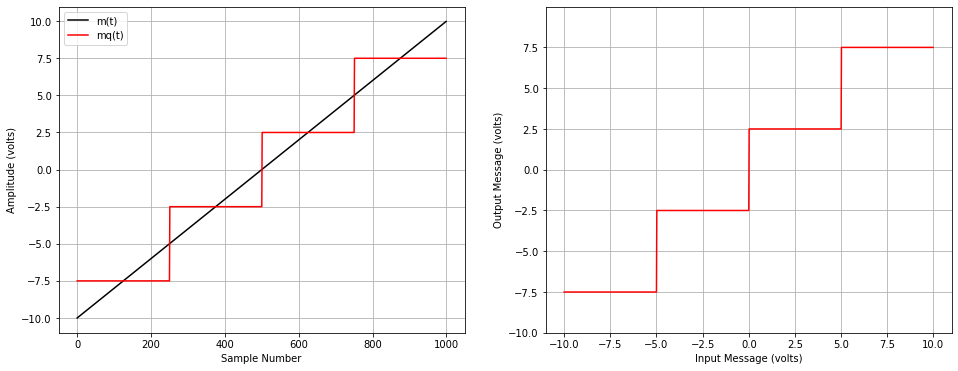

In [190]:
L = 4 # quantization levels must be 2^n, n is an integer value
DynamicRange=[-10, 10] # quantizer dynamic range


Amin=DynamicRange[0]
Amax=DynamicRange[1]
Astep=(DynamicRange[1]-DynamicRange[0])/1000
mt = np.arange(Amin,Amax,Astep)

delta=(DynamicRange[1]-DynamicRange[0])/L

mtq = (np.floor(mt/delta)+0.5)*delta

f = plt.figure(figsize=(16,6))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

## plo the linear message and the quantized version of the message
ax1.plot(mt,'k',label='m(t)')
ax1.plot(mtq,'r',label='mq(t)')
ax1.grid()
ax1.set_xlabel('Sample Number')
ax1.set_ylabel('Amplitude (volts)')
ax1.legend()

## plot the characteritic of the linear uniform quantizer
ax2.plot(mt,mtq,'r')
ax2.grid()
ax2.set_xlabel('Input Message (volts)')
ax2.set_ylabel('Output Message (volts)')
yticks=np.arange(DynamicRange[0],DynamicRange[1],delta/2)
ax2.set_yticks(yticks)
ax2.set_ylim(DynamicRange[0],DynamicRange[1])
print('Number of levels (L) is {}'.format(L))

**Exercise**: vary the number of quantization levels and observe the resulted characteristic of the uniform quantizer

# Characteristic of Mid-rise and Mid-tread Uniform (Linear) Quantizers 

The objective of this part is to recognize the difference between mid-rise and mid-tread quantizers. To demonstrate this difference, we will build an **n-bits quantizers** where **n** represents the number of bits used to encode each quantization level. Notice that the number of levels $L=2^n$.

Let us first build the mid-tread uniform quantizer

In [0]:
def func_UniformQuantizer_midtread(Data,DynamicRange,NumberBits):
  L=2**NumberBits
  Delta=(DynamicRange[1]-DynamicRange[0])/L
  Data_quantized = Delta*(np.round(Data/Delta))
  return Data_quantized

Next, we will build the mid-rise uniform quantizer

In [0]:
def func_UniformQuantizer_midrise(Data,DynamicRange,NumberBits):
  L=2**NumberBits
  Delta=(DynamicRange[1]-DynamicRange[0])/L
  Data_quantized = Delta*(np.floor(Data/Delta)+0.5)
  return Data_quantized

Now, we build and present the characteristic of both quantizers

Number of levels (L) = 4
Uniform Quantizer Step Size (Δ) = 4


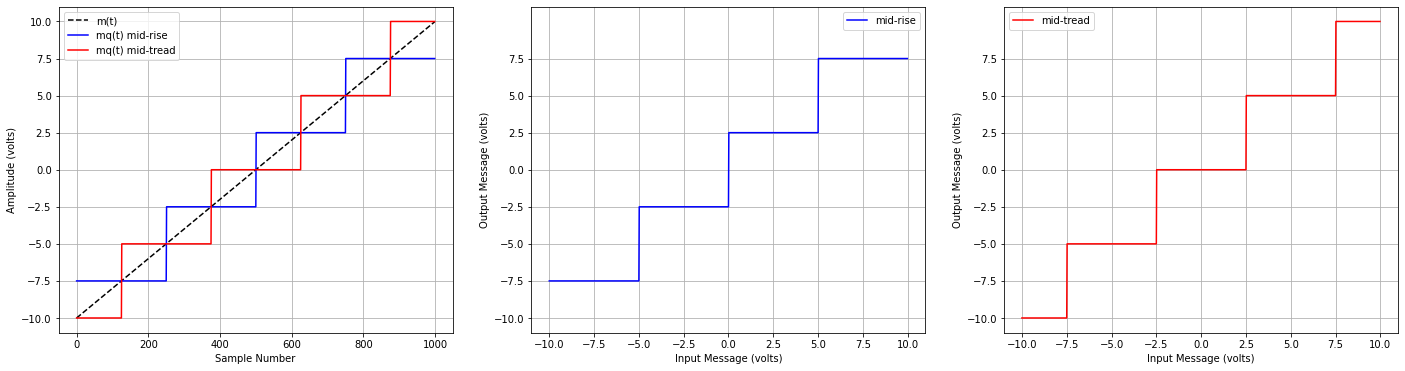

In [193]:
NumberBits=2
DynamicRange=[-10, 10]


Amin=DynamicRange[0]
Amax=DynamicRange[1]
Astep=(DynamicRange[1]-DynamicRange[0])/1000
mt = np.arange(Amin,Amax,Astep)

L=2**NumberBits
delta=(DynamicRange[1]-DynamicRange[0])/L

mtq_midrise = func_UniformQuantizer_midrise(mt,DynamicRange,NumberBits)
mtq_midtread = func_UniformQuantizer_midtread(mt,DynamicRange,NumberBits)


f = plt.figure(figsize=(24,6))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

## plo the linear message and the quatized version of the message
ax1.plot(mt,'--k',label='m(t)')
ax1.plot(mtq_midrise,'b',label='mq(t) mid-rise')
ax1.plot(mtq_midtread,'r',label='mq(t) mid-tread')
ax1.grid()
ax1.set_xlabel('Sample Number')
ax1.set_ylabel('Amplitude (volts)')
ax1.legend()
YLimit=ax1.get_ylim()

## plot the characteritic of the mid-rise linear uniform quantizer
ax2.plot(mt,mtq_midrise,'b',label='mid-rise')
ax2.grid()
ax2.set_xlabel('Input Message (volts)')
ax2.set_ylabel('Output Message (volts)')
yticks=np.arange(DynamicRange[0],DynamicRange[1],delta/2)
ax2.set_yticks(yticks)
ax2.set_ylim(YLimit)
ax2.legend()

## plot the characteritic of the mid-tread linear uniform quantizer
ax3.plot(mt,mtq_midtread,'r',label='mid-tread')
ax3.grid()
ax3.set_xlabel('Input Message (volts)')
ax3.set_ylabel('Output Message (volts)')
yticks=np.arange(DynamicRange[0],DynamicRange[1],delta/2)
ax3.set_yticks(yticks)
ax3.set_ylim(YLimit)
ax3.legend()

print('Number of levels (L) = {}'.format(L))
print('Uniform Quantizer Step Size (\u0394) = {}'.format(L))

**Exercise**: vary the value of **n** and observe the resulted number of levels, uniform quantization step size, and the characteristic of the uniform quantizer

**Note: for the rest of this experiment, we will always use  the mid-tread quantizer.**

# Characteristic of Robust (Non-Linear) Quantizer with DC input

We will use the $\mu$-Law quantizer to study robost quatizers. We will first build the $\mu$-Law compressor

In [0]:
def func_compressor(x,meu,DynamicRange):
  xmax=np.max(x)
  #y=(xmax*np.log(1+meu*(np.abs(x)/xmax))/np.log(1+meu))*np.sign(x)
  y=(DynamicRange[1]*np.log(1+meu*(np.abs(x)/xmax))/np.log(1+meu))*np.sign(x)
  return y

then we will build the $\mu$-Law expander

In [0]:
def func_expander(x,meu):
  xmax=np.max(x)
  y=(xmax/meu)*(((1+meu)**(np.abs(x)/xmax))-1)*np.sign(x)
  return y

Now, we are ready to plot the characteritics of the $\mu$-Law compressor and expander for $\mu$ = 255

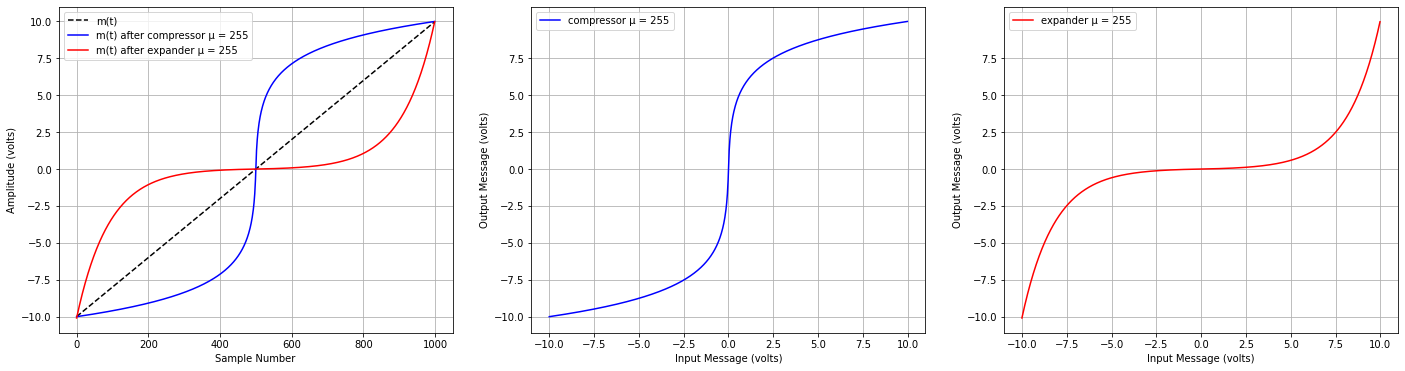

In [201]:
meu=255

NumberBits=2
DynamicRange=[-10, 10]

Amin=DynamicRange[0]
Amax=DynamicRange[1]
Astep=(DynamicRange[1]-DynamicRange[0])/1000
mt = np.arange(Amin,Amax,Astep)

L=2**NumberBits
delta=(DynamicRange[1]-DynamicRange[0])/L

mt_compressed = func_compressor(mt,meu,DynamicRange)
mt_expanded = func_expander(mt,meu)

f = plt.figure(figsize=(24,6))
ax1 = f.add_subplot(131)
ax2 = f.add_subplot(132)
ax3 = f.add_subplot(133)

## plot compressor and expander 
ax1.plot(mt,'--k',label='m(t)')
ax1.plot(mt_compressed,'b',label='m(t) after compressor \u03BC = {}'.format(meu))
ax1.plot(mt_expanded,'r',label='m(t) after expander \u03BC = {}'.format(meu))
ax1.grid()
ax1.set_xlabel('Sample Number')
ax1.set_ylabel('Amplitude (volts)')
ax1.legend()
YLimit=ax1.get_ylim()

## plot the characteritic of the mid-rise linear uniform quantizer
ax2.plot(mt,mt_compressed,'b',label='compressor \u03BC = {}'.format(meu))
ax2.grid()
ax2.set_xlabel('Input Message (volts)')
ax2.set_ylabel('Output Message (volts)')
yticks=np.arange(DynamicRange[0],DynamicRange[1],delta/2)
ax2.set_yticks(yticks)
ax2.set_ylim(YLimit)
ax2.legend()

## plot the characteritic of the mid-tread linear uniform quantizer
ax3.plot(mt,mt_expanded,'r',label='expander \u03BC = {}'.format(meu))
ax3.grid()
ax3.set_xlabel('Input Message (volts)')
ax3.set_ylabel('Output Message (volts)')
yticks=np.arange(DynamicRange[0],DynamicRange[1],delta/2)
ax3.set_yticks(yticks)
ax3.set_ylim(YLimit)
ax3.legend()


**Exercise**: What do you observe from the above figures regarding the characteristics of the $\mu$-Law compander?

To study the effect of changing $\mu$, we will plot the $\mu$-Law characteristics curve for different meu values

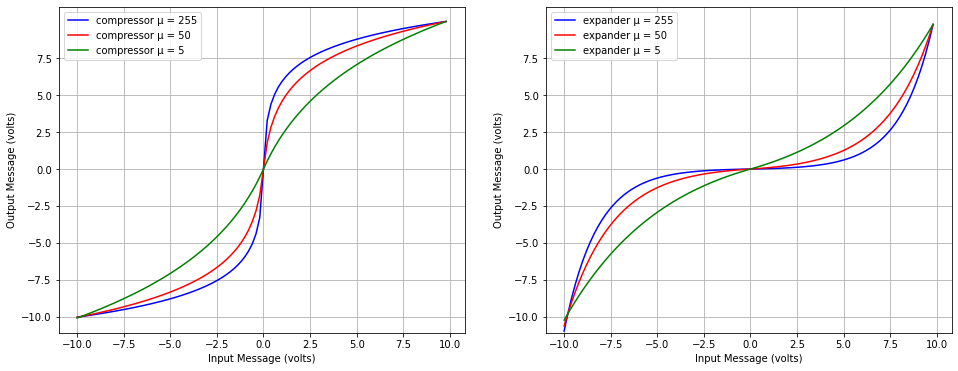

In [203]:
meu1=255
meu2=50
meu3=5

NumberBits=2
DynamicRange=[-10, 10]

Amin=DynamicRange[0]
Amax=DynamicRange[1]
Astep=(DynamicRange[1]-DynamicRange[0])/100
mt = np.arange(Amin,Amax,Astep)

L=2**NumberBits
delta=(DynamicRange[1]-DynamicRange[0])/L

mt_compressed_1 = func_compressor(mt,meu1,DynamicRange)
mt_expanded_1 = func_expander(mt,meu1)

mt_compressed_2 = func_compressor(mt,meu2,DynamicRange)
mt_expanded_2 = func_expander(mt,meu2)

mt_compressed_3 = func_compressor(mt,meu3,DynamicRange)
mt_expanded_3 = func_expander(mt,meu3)

f = plt.figure(figsize=(16,6))
ax1 = f.add_subplot(121)
ax2 = f.add_subplot(122)

## plot the characteritic of the mid-rise linear uniform quantizer
ax1.plot(mt,mt_compressed_1,'b',label='compressor \u03BC = {}'.format(meu1))
ax1.plot(mt,mt_compressed_2,'r',label='compressor \u03BC = {}'.format(meu2))
ax1.plot(mt,mt_compressed_3,'g',label='compressor \u03BC = {}'.format(meu3))
ax1.grid()
ax1.set_xlabel('Input Message (volts)')
ax1.set_ylabel('Output Message (volts)')
yticks=np.arange(DynamicRange[0],DynamicRange[1],delta/2)
ax1.set_yticks(yticks)
ax1.set_ylim(YLimit)
ax1.legend()

## plot the characteritic of the mid-tread linear uniform quantizer
ax2.plot(mt,mt_expanded_1,'b',label='expander \u03BC = {}'.format(meu1))
ax2.plot(mt,mt_expanded_2,'r',label='expander \u03BC = {}'.format(meu2))
ax2.plot(mt,mt_expanded_3,'g',label='expander \u03BC = {}'.format(meu3))
ax2.grid()
ax2.set_xlabel('Input Message (volts)')
ax2.set_ylabel('Output Message (volts)')
yticks=np.arange(DynamicRange[0],DynamicRange[1],delta/2)
ax2.set_yticks(yticks)
ax2.set_ylim(YLimit)
ax2.legend()


**Exercise**: What do you observe from these figures? 

**For the rest of this experiment we will use $\mu$=255 when applying robust quantizer.**

We will now plot the characteristics of the robust $\mu$-Law n-bit quantizer with n=4 and $\mu$=255 

Number of levels (L) = 16


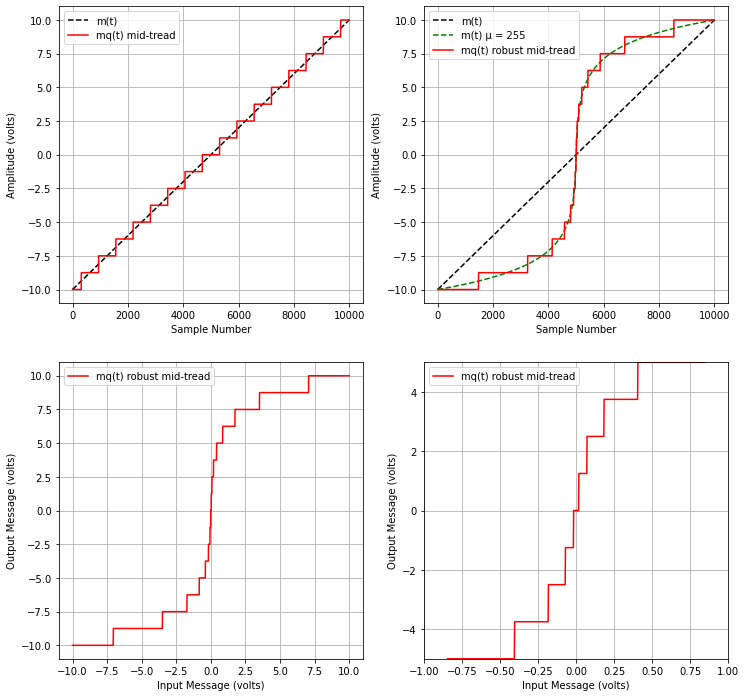

In [204]:
meu=255
NumberBits=4
DynamicRange=[-10, 10]

Amin=DynamicRange[0]
Amax=DynamicRange[1]
Astep=(DynamicRange[1]-DynamicRange[0])/10000
mt = np.arange(Amin,Amax,Astep)

L=2**NumberBits
delta=(DynamicRange[1]-DynamicRange[0])/L

mtq_midtread = func_UniformQuantizer_midtread(mt,DynamicRange,NumberBits)
mt_compressed = func_compressor(mt,meu,DynamicRange)
mtq_robust = func_UniformQuantizer_midtread(mt_compressed,DynamicRange,NumberBits)

f = plt.figure(figsize=(12,12))
ax1 = f.add_subplot(221)
ax2 = f.add_subplot(222)
ax3 = f.add_subplot(223)
ax4 = f.add_subplot(224)

## plot the characteritic of the mid-tread linear uniform quantizer
ax1.plot(mt,'--k',label='m(t)')
ax1.plot(mtq_midtread,'r',label='mq(t) mid-tread')
ax1.grid()
ax1.set_xlabel('Sample Number')
ax1.set_ylabel('Amplitude (volts)')
ax1.legend()

## plot the characteritic of the mid-tread robust meu-Law quantizer
ax2.plot(mt,'--k',label='m(t)')
ax2.plot(mt_compressed,'--g',label='m(t) \u03BC = {}'.format(meu))
ax2.plot(mtq_robust,'r',label='mq(t) robust mid-tread')
ax2.grid()
ax2.set_xlabel('Sample Number')
ax2.set_ylabel('Amplitude (volts)')
ax2.legend()

## plot the characteritic of the mid-tread linear uniform quantizer
ax3.plot(mt,mtq_robust,'r',label='mq(t) robust mid-tread')
ax3.grid()
ax3.set_xlabel('Input Message (volts)')
ax3.set_ylabel('Output Message (volts)')
ax3.legend()

## plot the characteritic of the mid-tread linear uniform quantizer
ax4.plot(mt,mtq_robust,'r',label='mq(t) robust mid-tread')
ax4.grid()
ax4.set_xlabel('Input Message (volts)')
ax4.set_ylabel('Output Message (volts)')
ax4.legend()
ax4.set_xlim([-1,1])
ax4.set_ylim([-5,5])
print('Number of levels (L) = {}'.format(L))

**Exercise**: vary the valus of **n** and **$\mu$** and observe the characteristics of the $\mu$-Law robust compressor

# Uniform Quantization of Single Tune Message Signal

In this section, we will study the quantization of a message signal by implementing the following procedure:
1. Sample a message signal $m(t)$ with $f_s> 2W$ ($W$ is the bandwidth of the message signal) to get the message samples ($m[i], i=1,2,...,N$),
2. Compute the power of the sampled signal ($P_{sampled-signal}=\frac{1}{N}\sum_{i=1}^Nm[i]^2$)
3. Apply n-bits uniform quantizer to the sampled signal to get the quantized samples ($m_q[i], i=1,2,...,N$),
4. Measure the error (noise,difference) between the original and sampled signal ($e[i]=m[i]-m_q[i]$),
5. Compute the power of the quantization noise ($P_{quantization-noise}=\frac{1}{N}\sum_{i=1}^Ne[i]^2$)
7. Compute the Signal-to-Quanatization Noise Ratio ($SQNR=\frac{P_{sampled-signal}}{P_{quantization-noise}}$),
8. Reconstruct the quantized signal using an ideal low-pass filter
9. Plot the original message, sampled message, quantized message, reconstructed message, and the error signal (the difference between original and reconstructed message signals).


Let us now convert a message signal $m(t) = A_m \cos( 2 \pi f_mt)$ to digital using the ideal sampling method and n-bit uniform quatizer. We will set $A_m=1$ Volts, $f_m=10$ Hz, $f_s=100$ Hz, $n=4$ bits, and quantizer dynamic range $D=[-1,1]$.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)



Power of the sampled signal = 0.4999999999999956 watts
Power of the quantized signal = 0.45 watts
Power of the quantization noise = 0.0027864045000415795 watts
Signal to Quantization Noise Ratio = 179.442719100021



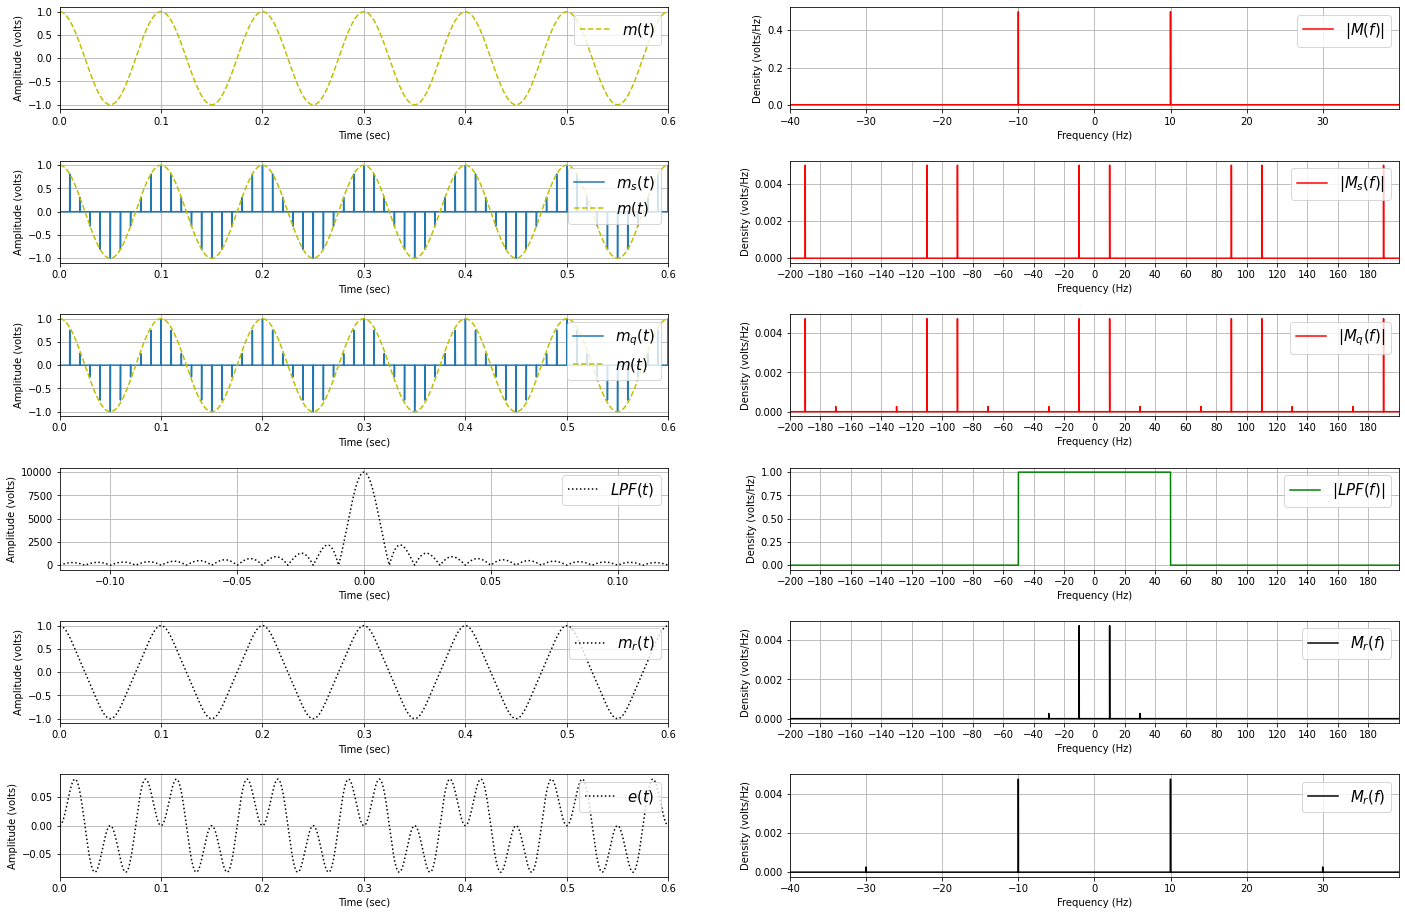

In [205]:
## Parameters of message signal
fm=10    # frequency of message signal (1)
Am=1    # amplitude of message signal (1)

## sampling parameters
fs=100    # frequency of the periodic pulse train 

# Ideal LPF parameter 
f3db = fs/2  # Cut-off frequency of the filter

## Parameters of the uniform quantizer
NumberBits=4
DynamicRange=[-1, 1]

## Sampling of m(t)
dfs=100
Tstart=0
Tstop=100
Tstep=1/(fs*dfs)
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the sequence
lenTs= int(1/(fs*Tstep))   # period length
N=len(t)

mt=Am*np.cos(2 * np.pi * fm* t) # message signal

impls=np.zeros(L)
for i in  range (0, L,lenTs):
    impls[i]=1
    
mtIdeal= impls*mt # sampled signal

mtIdealq_midtread = func_UniformQuantizer_midtread(mtIdeal,DynamicRange,NumberBits) ## quantized signal 

## plot the sampled and reconstrcuted signal
f = plt.figure(figsize=(24,16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
ax1 = f.add_subplot(621)
ax2 = f.add_subplot(622)
ax3 = f.add_subplot(623)
ax4 = f.add_subplot(624)
ax5 = f.add_subplot(625)
ax6 = f.add_subplot(626)
ax7 = f.add_subplot(627)
ax8 = f.add_subplot(628)
ax9 = f.add_subplot(629)
ax10 = f.add_subplot(6,2,10)
ax11 = f.add_subplot(6,2,11)
ax12 = f.add_subplot(6,2,12)

##original message in the time domain
ax1.plot(t,mt,'y--',label='$m(t)$')
ax1.set_xlim(0,6/fm)
ax1.grid()
ax1.legend(prop={"size":15},loc='upper right')
ax1.set_xlabel('Time (sec)')
ax1.set_ylabel('Amplitude (volts)')

##Sampled Signal in the time domain
ax3.plot(t, mtIdeal,label='$m_s(t)$')
ax3.plot(t,mt,'y--',label='$m(t)$')
ax3.set_xlim(0,6/fm)
ax3.grid()
ax3.legend(prop={"size":15},loc='upper right')
ax3.set_xlabel('Time (sec)')
ax3.set_ylabel('Amplitude (volts)')

##Quantized Signal in the time domain
ax5.plot(t, mtIdealq_midtread,label='$m_q(t)$')
ax5.plot(t,mt,'y--',label='$m(t)$')
ax5.set_xlim(0,6/fm)
ax5.grid()
ax5.legend(prop={"size":15},loc='upper right')
ax5.set_xlabel('Time (sec)')
ax5.set_ylabel('Amplitude (volts)')

##Original Signal in the frequency domain
SFc = np.fft.fft(mt)
SF = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax2.plot(freqs, SF,'r',label='$|M(f)|$')
ax2.set_xlim(-4*fm, 4*fm)
xticks = np.arange(-4*(fm), 4*(fm), fm)
ax2.set_xticks(xticks)
ax2.grid()
ax2.legend(prop={"size":15},loc='upper right')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Density (volts/Hz)')


##Sampled Signal in the frequency domain  
SF = np.fft.fft(mtIdeal)
freqs = np.fft.fftfreq(mtIdeal.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax4.plot(freqs, np.abs(SF),'r',label='$|M_s(f)|$')
ax4.set_xlim(-2*fs,2*fs)
xticks = np.arange(-2*fs,2*fs, 20)
ax4.set_xticks(xticks)
ax4.grid()
ax4.legend(prop={"size":15},loc='upper right')
ax4.set_xlabel('Frequency (Hz)')
ax4.set_ylabel('Density (volts/Hz)')


##quantized Signal in the frequency domain 
SFq = np.fft.fft(mtIdealq_midtread)
freqs = np.fft.fftfreq(mtIdealq_midtread.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SFq=SFq[idx]/N
ax6.plot(freqs, np.abs(SFq),'r',label='$|M_q(f)|$')
ax6.set_xlim(-2*fs,2*fs)
xticks = np.arange(-2*fs,2*fs, 20)
ax6.set_xticks(xticks)
ax6.grid()
ax6.legend(prop={"size":15},loc='upper right')
ax6.set_xlabel('Frequency (Hz)')
ax6.set_ylabel('Density (volts/Hz)')


## Ideal Filter frequency response
frfilter=np.zeros(len(freqs))
for i in range(len(freqs)):
  if abs(freqs[i]) <= f3db:
    frfilter[i] = 1

## plot the frequency response of the filter
ax8.plot(freqs, frfilter,'g',label='$|LPF(f)|$')
ax8.set_xlabel('frequency (Hz)')
ax8.set_xlim(-2*fs,2*fs)
xticks = np.arange(-2*fs,2*fs,fs/5)
ax8.set_xticks(xticks)
ax8.grid()
ax8.legend(prop={"size":15},loc='upper right')
ax8.set_xlabel('Frequency (Hz)')
ax8.set_ylabel('Density (volts/Hz)')


## plot the impulse response of the filter
ifilter = np.fft.ifft(frfilter)*N
ifilterPos=ifilter
ifilterNeg=ifilter[::-1]
ifilter=np.concatenate((ifilterNeg, ifilterPos),axis=0)
tNegPos=np.concatenate((-1*t[::-1], t),axis=0)
i=range(1,len(ifilter))
ax7.plot(tNegPos[i], np.abs(ifilter[i]),'k:',label='$LPF(t)$')
ax7.set_xlim(-6/f3db,6/f3db)
ax7.grid()
ax7.legend(prop={"size":15},loc='upper right')
ax7.set_xlabel('Time (sec)')
ax7.set_ylabel('Amplitude (volts)')


## Reconstructed Signal in the frequency domain
SFq=SFq*frfilter
ax10.plot(freqs, np.abs(SFq.real),'k',label='$M_r(f)$')
ax10.set_xlim(-2*fs,2*fs)
xticks = np.arange(-2*fs,2*fs, 20)
ax10.set_xticks(xticks)
ax10.grid()
ax10.legend(prop={"size":15},loc='upper right')
ax10.set_xlabel('Frequency (Hz)')
ax10.set_ylabel('Density (volts/Hz)')

##Reconstructed Signal in the time domain
mtIdeal_reconstructed = np.fft.ifft(SFq)*N*dfs
i=range(0,len(t),2)
ax9.plot(t[i], mtIdeal_reconstructed[i],'k:',label='$m_r(t)$')
ax9.set_xlim(0,6/fm)
ax9.grid()
ax9.legend(prop={"size":15},loc='upper right')
ax9.set_xlabel('Time (sec)')
ax9.set_ylabel('Amplitude (volts)')

## Zoom in for the reconstructed Signal in the frequency domain
ax12.plot(freqs, SFq,'k',label='$M_r(f)$')
ax12.set_xlim(-4*fm, 4*fm)
xticks = np.arange(-4*fm, 4*fm, fm)
ax12.set_xticks(xticks)
ax12.grid()
ax12.legend(prop={"size":15},loc='upper right')
ax12.set_xlabel('Frequency (Hz)')
ax12.set_ylabel('Density (volts/Hz)')

## Error between the original message and the reconstructed message
ax11.plot(t[i], mt[i]-mtIdeal_reconstructed[i].real,'k:',label='$e(t)$')
ax11.set_xlim(0,6/fm)
ax11.grid()
ax11.legend(prop={"size":15},loc='upper right')
ax11.set_xlabel('Time (sec)')
ax11.set_ylabel('Amplitude (volts)')

Psampled=np.sum(mtIdeal[::fs]**2)/(len(mtIdeal)/dfs)
Pquantized=np.sum(mtIdealq_midtread[::fs]**2)/(len(mtIdealq_midtread)/dfs)
PN=np.sum((mtIdeal[::fs]-mtIdealq_midtread[::fs])**2)/(len(mt)/dfs)
SQNR=Psampled/PN

print ('\033[34m')
print('Power of the sampled signal = {} watts'.format(Psampled))
print('Power of the quantized signal = {} watts'.format(Pquantized))
print('Power of the quantization noise = {} watts'.format(PN))
print('Signal to Quantization Noise Ratio = {}'.format(SQNR))
print ('\033[40m')

**Exercise**: vary the number of bits and observe the resulted plots and power values (including SQNR).


# Uniform Quantization of Weak Message Signal

In this section we will repeate the above implememntation procedure for the case when the quantizer dynamic range doesn't match the message signal (apply weak signal to uniform quantizer). To this we will convert a message signal $m(t) = A_m \cos( 2 \pi f_mt)$ to digital using the ideal sampling method and n-bit uniform quatizer with the following parameters: $A_m=1$ Volts, $f_m=10$ Hz, $f_s=100$ Hz, $n=4$ bits, and **quantizer dynamic range $D=[-10,10]$**.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)



Power of the sampled signal = 0.4999999999999956 watts
Power of the quantized signal = 0.9375 watts
Power of the quantization noise = 0.1284830056250528 watts
Signal to Quantization Noise Ratio = 3.891565250731502



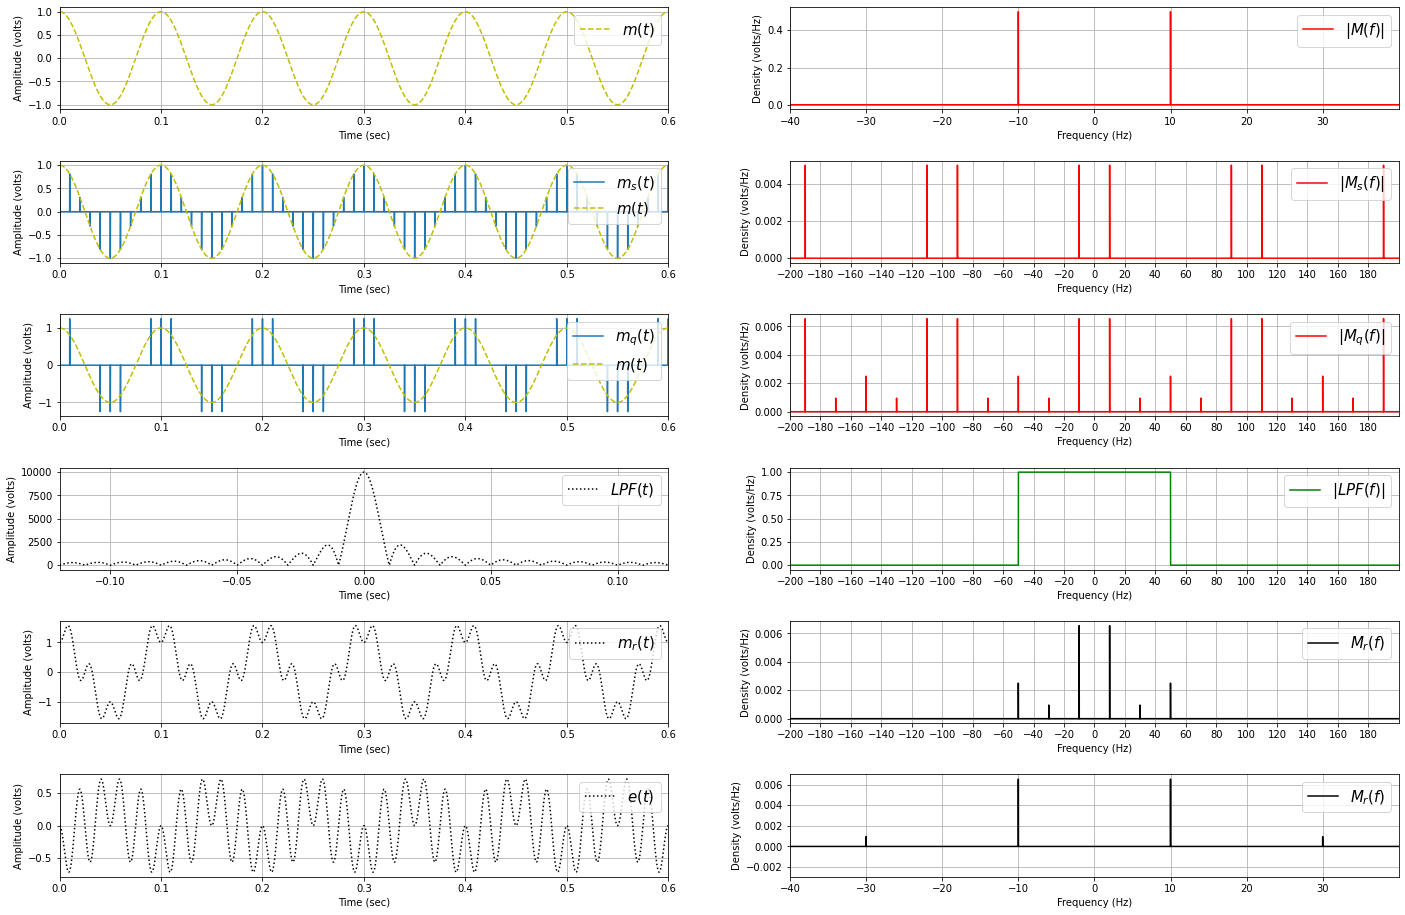

In [206]:
## Parameters of message signal
fm=10    # frequency of message signal (1)
Am=1    # amplitude of message signal (1)

## sampling parameters
fs=100    # frequency of the periodic pulse train 

# Ideal LPF parameter 
f3db = fs/2  # Cut-off frequency of the filter

## Parameters of the uniform quantizer
NumberBits=4
DynamicRange=[-10, 10]

## Sampling of m(t)
dfs=100
Tstart=0
Tstop=100
Tstep=1/(fs*dfs)
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the sequence
lenTs= int(1/(fs*Tstep))   # period length
N=len(t)

mt=Am*np.cos(2 * np.pi * fm* t) # message signal

impls=np.zeros(L)
for i in  range (0, L,lenTs):
    impls[i]=1
    
mtIdeal= impls*mt # sampled signal

mtIdealq_midtread = func_UniformQuantizer_midtread(mtIdeal,DynamicRange,NumberBits) ## quantized signal 

## plot the sampled and reconstrcuted signal
f = plt.figure(figsize=(24,16))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
ax1 = f.add_subplot(621)
ax2 = f.add_subplot(622)
ax3 = f.add_subplot(623)
ax4 = f.add_subplot(624)
ax5 = f.add_subplot(625)
ax6 = f.add_subplot(626)
ax7 = f.add_subplot(627)
ax8 = f.add_subplot(628)
ax9 = f.add_subplot(629)
ax10 = f.add_subplot(6,2,10)
ax11 = f.add_subplot(6,2,11)
ax12 = f.add_subplot(6,2,12)

##original message in the time domain
ax1.plot(t,mt,'y--',label='$m(t)$')
ax1.set_xlim(0,6/fm)
ax1.grid()
ax1.legend(prop={"size":15},loc='upper right')
ax1.set_xlabel('Time (sec)')
ax1.set_ylabel('Amplitude (volts)')

##Sampled Signal in the time domain
ax3.plot(t, mtIdeal,label='$m_s(t)$')
ax3.plot(t,mt,'y--',label='$m(t)$')
ax3.set_xlim(0,6/fm)
ax3.grid()
ax3.legend(prop={"size":15},loc='upper right')
ax3.set_xlabel('Time (sec)')
ax3.set_ylabel('Amplitude (volts)')

##Quantized Signal in the time domain
ax5.plot(t, mtIdealq_midtread,label='$m_q(t)$')
ax5.plot(t,mt,'y--',label='$m(t)$')
ax5.set_xlim(0,6/fm)
ax5.grid()
ax5.legend(prop={"size":15},loc='upper right')
ax5.set_xlabel('Time (sec)')
ax5.set_ylabel('Amplitude (volts)')

##Original Signal in the frequency domain
SFc = np.fft.fft(mt)
SF = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax2.plot(freqs, SF,'r',label='$|M(f)|$')
ax2.set_xlim(-4*fm, 4*fm)
xticks = np.arange(-4*(fm), 4*(fm), fm)
ax2.set_xticks(xticks)
ax2.grid()
ax2.legend(prop={"size":15},loc='upper right')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Density (volts/Hz)')


##Sampled Signal in the frequency domain  
SF = np.fft.fft(mtIdeal)
freqs = np.fft.fftfreq(mtIdeal.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax4.plot(freqs, np.abs(SF),'r',label='$|M_s(f)|$')
ax4.set_xlim(-2*fs,2*fs)
xticks = np.arange(-2*fs,2*fs, 20)
ax4.set_xticks(xticks)
ax4.grid()
ax4.legend(prop={"size":15},loc='upper right')
ax4.set_xlabel('Frequency (Hz)')
ax4.set_ylabel('Density (volts/Hz)')


##quantized Signal in the frequency domain 
SFq = np.fft.fft(mtIdealq_midtread)
freqs = np.fft.fftfreq(mtIdealq_midtread.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SFq=SFq[idx]/N
ax6.plot(freqs, np.abs(SFq),'r',label='$|M_q(f)|$')
ax6.set_xlim(-2*fs,2*fs)
xticks = np.arange(-2*fs,2*fs, 20)
ax6.set_xticks(xticks)
ax6.grid()
ax6.legend(prop={"size":15},loc='upper right')
ax6.set_xlabel('Frequency (Hz)')
ax6.set_ylabel('Density (volts/Hz)')


## Ideal Filter frequency response
frfilter=np.zeros(len(freqs))
for i in range(len(freqs)):
  if abs(freqs[i]) <= f3db:
    frfilter[i] = 1

## plot the frequency response of the filter
ax8.plot(freqs, frfilter,'g',label='$|LPF(f)|$')
ax8.set_xlabel('frequency (Hz)')
ax8.set_xlim(-2*fs,2*fs)
xticks = np.arange(-2*fs,2*fs,fs/5)
ax8.set_xticks(xticks)
ax8.grid()
ax8.legend(prop={"size":15},loc='upper right')
ax8.set_xlabel('Frequency (Hz)')
ax8.set_ylabel('Density (volts/Hz)')


## plot the impulse response of the filter
ifilter = np.fft.ifft(frfilter)*N
ifilterPos=ifilter
ifilterNeg=ifilter[::-1]
ifilter=np.concatenate((ifilterNeg, ifilterPos),axis=0)
tNegPos=np.concatenate((-1*t[::-1], t),axis=0)
i=range(1,len(ifilter))
ax7.plot(tNegPos[i], np.abs(ifilter[i]),'k:',label='$LPF(t)$')
ax7.set_xlim(-6/f3db,6/f3db)
ax7.grid()
ax7.legend(prop={"size":15},loc='upper right')
ax7.set_xlabel('Time (sec)')
ax7.set_ylabel('Amplitude (volts)')


## Reconstructed Signal in the frequency domain
SFq=SFq*frfilter
ax10.plot(freqs, np.abs(SFq.real),'k',label='$M_r(f)$')
ax10.set_xlim(-2*fs,2*fs)
xticks = np.arange(-2*fs,2*fs, 20)
ax10.set_xticks(xticks)
ax10.grid()
ax10.legend(prop={"size":15},loc='upper right')
ax10.set_xlabel('Frequency (Hz)')
ax10.set_ylabel('Density (volts/Hz)')

##Reconstructed Signal in the time domain
mtIdeal_reconstructed = np.fft.ifft(SFq)*N*dfs
i=range(0,len(t),2)
ax9.plot(t[i], mtIdeal_reconstructed[i],'k:',label='$m_r(t)$')
ax9.set_xlim(0,6/fm)
ax9.grid()
ax9.legend(prop={"size":15},loc='upper right')
ax9.set_xlabel('Time (sec)')
ax9.set_ylabel('Amplitude (volts)')

## Zoom in for the reconstructed Signal in the frequency domain
ax12.plot(freqs, SFq,'k',label='$M_r(f)$')
ax12.set_xlim(-4*fm, 4*fm)
xticks = np.arange(-4*fm, 4*fm, fm)
ax12.set_xticks(xticks)
ax12.grid()
ax12.legend(prop={"size":15},loc='upper right')
ax12.set_xlabel('Frequency (Hz)')
ax12.set_ylabel('Density (volts/Hz)')

## Error between the original message and the reconstructed message
ax11.plot(t[i], mt[i]-mtIdeal_reconstructed[i].real,'k:',label='$e(t)$')
ax11.set_xlim(0,6/fm)
ax11.grid()
ax11.legend(prop={"size":15},loc='upper right')
ax11.set_xlabel('Time (sec)')
ax11.set_ylabel('Amplitude (volts)')

Psampled=np.sum(mtIdeal[::fs]**2)/(len(mtIdeal)/dfs)
Pquantized=np.sum(mtIdealq_midtread[::fs]**2)/(len(mtIdealq_midtread)/dfs)
PN=np.sum((mtIdeal[::fs]-mtIdealq_midtread[::fs])**2)/(len(mt)/dfs)
SQNR=Psampled/PN

print ('\033[34m')
print('Power of the sampled signal = {} watts'.format(Psampled))
print('Power of the quantized signal = {} watts'.format(Pquantized))
print('Power of the quantization noise = {} watts'.format(PN))
print('Signal to Quantization Noise Ratio = {}'.format(SQNR))
print ('\033[40m')

**Exercise**: vary the number of bits and observe the resulted plots and power values (including SQNR).


# Robust ($\mu-Law$) Quantization of a Single Tune Message Signal

In this section, we will repate the above implememntation procedure. However, we will use a robust quantizer instead of the uniform quantizer. To investigate the performnce of this ssystem we will convert a message signal $m(t) = A_m \cos( 2 \pi f_mt)$ to digital using the ideal sampling method and n-bit robust quatizer ($\mu=255$) with the following parameters: $A_m=1$ Volts, $f_m=10$ Hz, $f_s=100$ Hz, $n=4$ bits, and **quantizer dynamic range $D=[-10,10]$**.

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)



Power of the sampled signal = 0.4999999999999956 watts
Power of the quantized signal = 0.6244152249134948 watts
Power of the quantization noise = 0.0161253293488418 watts
Signal to Quantization Noise Ratio = 31.007118625822553



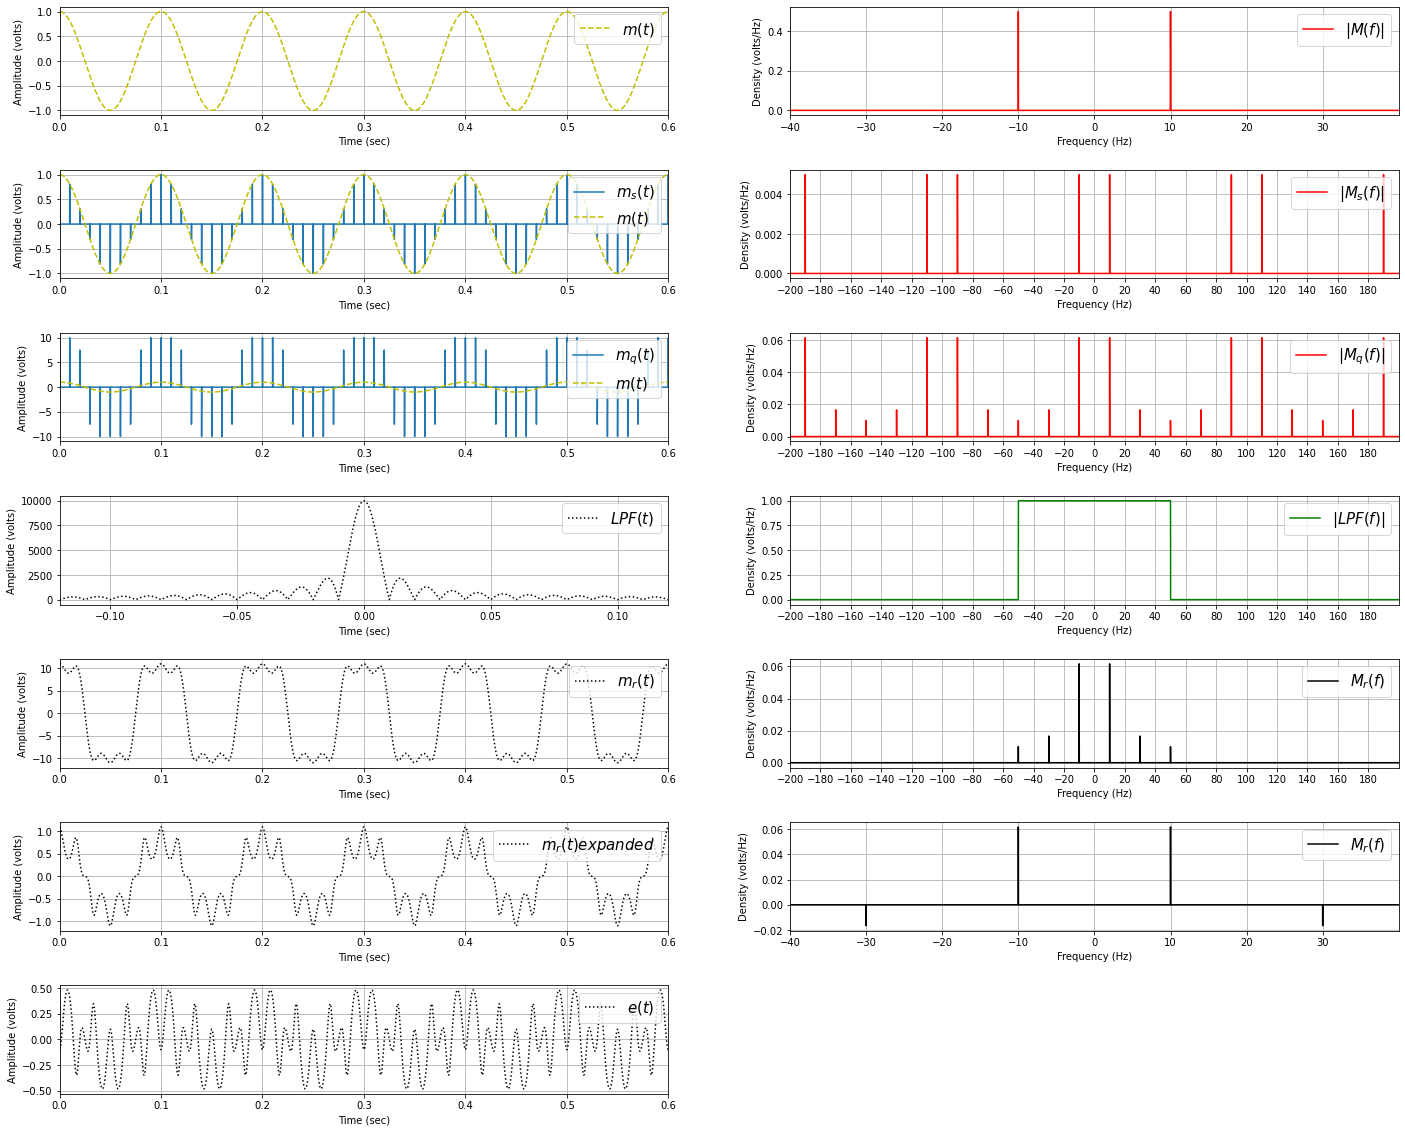

In [210]:
## Parameters of message signal
fm=10    # frequency of message signal (1)
Am=1    # amplitude of message signal (1)

## sampling parameters
fs=100    # frequency of the periodic pulse train 

# Ideal LPF parameter 
f3db = fs/2  # Cut-off frequency of the filter

## Parameters of the robust quantizer
NumberBits=4
DynamicRange=[-10, 10]
meu=255

## Sampling of m(t)
dfs=100
Tstart=0
Tstop=100
Tstep=1/(fs*dfs)
t = np.arange(Tstart,Tstop,Tstep)
L=len(t)    # length of the sequence
lenTs= int(1/(fs*Tstep))   # period length
N=len(t)

mt=Am*np.cos(2 * np.pi * fm* t) # message signal

impls=np.zeros(L)
for i in  range (0, L,lenTs):
    impls[i]=1
    
mtIdeal= impls*mt # sampled signal

mtIdeal_compressed = func_compressor(mtIdeal,meu,DynamicRange)
mtIdealq_midtread = func_UniformQuantizer_midtread(mtIdeal_compressed,DynamicRange,NumberBits) ## quantized signal 

mtIdealq_midtread_expanded = func_expander(mtIdealq_midtread,meu)*np.max(mt)/DynamicRange[1] ## to compute SQNR

## plot the sampled and reconstrcuted signal
f = plt.figure(figsize=(24,20))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.5)
ax1 = f.add_subplot(721)
ax2 = f.add_subplot(722)
ax3 = f.add_subplot(723)
ax4 = f.add_subplot(724)
ax5 = f.add_subplot(725)
ax6 = f.add_subplot(726)
ax7 = f.add_subplot(727)
ax8 = f.add_subplot(728)
ax9 = f.add_subplot(729)
ax10 = f.add_subplot(7,2,10)
ax11 = f.add_subplot(7,2,11)
ax12 = f.add_subplot(7,2,12)
ax13 = f.add_subplot(7,2,13)

##original message in the time domain
ax1.plot(t,mt,'y--',label='$m(t)$')
ax1.set_xlim(0,6/fm)
ax1.grid()
ax1.legend(prop={"size":15},loc='upper right')
ax1.set_xlabel('Time (sec)')
ax1.set_ylabel('Amplitude (volts)')

##Sampled Signal in the time domain
ax3.plot(t, mtIdeal,label='$m_s(t)$')
ax3.plot(t,mt,'y--',label='$m(t)$')
ax3.set_xlim(0,6/fm)
ax3.grid()
ax3.legend(prop={"size":15},loc='upper right')
ax3.set_xlabel('Time (sec)')
ax3.set_ylabel('Amplitude (volts)')

##Quantized Signal in the time domain
ax5.plot(t, mtIdealq_midtread,label='$m_q(t)$')
ax5.plot(t,mt,'y--',label='$m(t)$')
ax5.set_xlim(0,6/fm)
ax5.grid()
ax5.legend(prop={"size":15},loc='upper right')
ax5.set_xlabel('Time (sec)')
ax5.set_ylabel('Amplitude (volts)')

##Original Signal in the frequency domain
SFc = np.fft.fft(mt)
SF = np.abs(np.fft.fft(mt))
freqs = np.fft.fftfreq(mt.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax2.plot(freqs, SF,'r',label='$|M(f)|$')
ax2.set_xlim(-4*fm, 4*fm)
xticks = np.arange(-4*(fm), 4*(fm), fm)
ax2.set_xticks(xticks)
ax2.grid()
ax2.legend(prop={"size":15},loc='upper right')
ax2.set_xlabel('Frequency (Hz)')
ax2.set_ylabel('Density (volts/Hz)')


##Sampled Signal in the frequency domain  
SF = np.fft.fft(mtIdeal)
freqs = np.fft.fftfreq(mtIdeal.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SF=SF[idx]/N
ax4.plot(freqs, np.abs(SF),'r',label='$|M_s(f)|$')
ax4.set_xlim(-2*fs,2*fs)
xticks = np.arange(-2*fs,2*fs, 20)
ax4.set_xticks(xticks)
ax4.grid()
ax4.legend(prop={"size":15},loc='upper right')
ax4.set_xlabel('Frequency (Hz)')
ax4.set_ylabel('Density (volts/Hz)')


##quantized Signal in the frequency domain 
SFq = np.fft.fft(mtIdealq_midtread)
freqs = np.fft.fftfreq(mtIdealq_midtread.size, Tstep)
idx = np.argsort(freqs)
freqs=freqs[idx]
SFq=SFq[idx]/N
ax6.plot(freqs, np.abs(SFq),'r',label='$|M_q(f)|$')
ax6.set_xlim(-2*fs,2*fs)
xticks = np.arange(-2*fs,2*fs, 20)
ax6.set_xticks(xticks)
ax6.grid()
ax6.legend(prop={"size":15},loc='upper right')
ax6.set_xlabel('Frequency (Hz)')
ax6.set_ylabel('Density (volts/Hz)')


## Ideal Filter frequency response
frfilter=np.zeros(len(freqs))
for i in range(len(freqs)):
  if abs(freqs[i]) <= f3db:
    frfilter[i] = 1

## plot the frequency response of the filter
ax8.plot(freqs, frfilter,'g',label='$|LPF(f)|$')
ax8.set_xlabel('frequency (Hz)')
ax8.set_xlim(-2*fs,2*fs)
xticks = np.arange(-2*fs,2*fs,fs/5)
ax8.set_xticks(xticks)
ax8.grid()
ax8.legend(prop={"size":15},loc='upper right')
ax8.set_xlabel('Frequency (Hz)')
ax8.set_ylabel('Density (volts/Hz)')


## plot the impulse response of the filter
ifilter = np.fft.ifft(frfilter)*N
ifilterPos=ifilter
ifilterNeg=ifilter[::-1]
ifilter=np.concatenate((ifilterNeg, ifilterPos),axis=0)
tNegPos=np.concatenate((-1*t[::-1], t),axis=0)
i=range(1,len(ifilter))
ax7.plot(tNegPos[i], np.abs(ifilter[i]),'k:',label='$LPF(t)$')
ax7.set_xlim(-6/f3db,6/f3db)
ax7.grid()
ax7.legend(prop={"size":15},loc='upper right')
ax7.set_xlabel('Time (sec)')
ax7.set_ylabel('Amplitude (volts)')


## Reconstructed Signal in the frequency domain
SFq=SFq*frfilter
ax10.plot(freqs, np.abs(SFq.real),'k',label='$M_r(f)$')
ax10.set_xlim(-2*fs,2*fs)
xticks = np.arange(-2*fs,2*fs, 20)
ax10.set_xticks(xticks)
ax10.grid()
ax10.legend(prop={"size":15},loc='upper right')
ax10.set_xlabel('Frequency (Hz)')
ax10.set_ylabel('Density (volts/Hz)')

##Reconstructed Signal in the time domain
mtIdeal_reconstructed = np.fft.ifft(SFq)*N*dfs
i=range(0,len(t),2)
ax9.plot(t[i], mtIdeal_reconstructed[i],'k:',label='$m_r(t)$')
ax9.set_xlim(0,6/fm)
ax9.grid()
ax9.legend(prop={"size":15},loc='upper right')
ax9.set_xlabel('Time (sec)')
ax9.set_ylabel('Amplitude (volts)')

##Reconstructed Signal after companding in the time domain
mtIdeal_reconstructed_expanded = func_expander(mtIdeal_reconstructed,meu)
i=range(0,len(t),2)
ax11.plot(t[i], mtIdeal_reconstructed_expanded[i]*np.max(mt)/DynamicRange[1],'k:',label='$m_r(t) expanded$')
ax11.set_xlim(0,6/fm)
ax11.grid()
ax11.legend(prop={"size":15},loc='upper right')
ax11.set_xlabel('Time (sec)')
ax11.set_ylabel('Amplitude (volts)')

## Zoom in for the reconstructed Signal in the frequency domain
ax12.plot(freqs, SFq,'k',label='$M_r(f)$')
ax12.set_xlim(-4*fm, 4*fm)
xticks = np.arange(-4*fm, 4*fm, fm)
ax12.set_xticks(xticks)
ax12.grid()
ax12.legend(prop={"size":15},loc='upper right')
ax12.set_xlabel('Frequency (Hz)')
ax12.set_ylabel('Density (volts/Hz)')

## Error between the original message and the reconstructed message
ax13.plot(t[i], mt[i]-(mtIdeal_reconstructed_expanded[i].real*np.max(mt)/DynamicRange[1]),'k:',label='$e(t)$')
ax13.set_xlim(0,6/fm)
ax13.grid()
ax13.legend(prop={"size":15},loc='upper right')
ax13.set_xlabel('Time (sec)')
ax13.set_ylabel('Amplitude (volts)')

Psampled=np.sum(mtIdeal[::fs]**2)/(len(mtIdeal)/dfs)
Pquantized=np.sum(mtIdealq_midtread_expanded[::fs]**2)/(len(mtIdealq_midtread_expanded)/dfs)
PN=np.sum((mtIdeal[::fs]-mtIdealq_midtread_expanded[::fs])**2)/(len(mt)/dfs)
SQNR=Psampled/PN

print ('\033[34m')
print('Power of the sampled signal = {} watts'.format(Psampled))
print('Power of the quantized signal = {} watts'.format(Pquantized))
print('Power of the quantization noise = {} watts'.format(PN))
print('Signal to Quantization Noise Ratio = {}'.format(SQNR))
print ('\033[40m')

**Exercise**: vary the following parameters observe the resulted plots and power values (including SQNR):
1. Number of bits 
2. $\mu$ value
3. Quantizer dynamic range